In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
spam_df = pd.read_csv("/content/drive/MyDrive/combined_data.csv")

In [3]:
spam_df = pd.DataFrame(spam_df)

In [4]:
spam_df.info

<bound method DataFrame.info of        label                                               text
0          1  ounce feather bowl hummingbird opec moment ala...
1          1  wulvob get your medircations online qnb ikud v...
2          0   computer connection from cnn com wednesday es...
3          1  university degree obtain a prosperous future m...
4          0  thanks for all your answers guys i know i shou...
...      ...                                                ...
83443      0  hi given a date how do i get the last date of ...
83444      1  now you can order software on cd or download i...
83445      1  dear valued member canadianpharmacy provides a...
83446      0  subscribe change profile contact us long term ...
83447      1  get the most out of life ! viagra has helped m...

[83448 rows x 2 columns]>

In [5]:
max_words = 1000
max_len = 20

In [6]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(spam_df['text'])
sequences = tokenizer.texts_to_sequences(spam_df['text'])
data = pad_sequences(sequences, maxlen=max_len)

In [7]:
import pickle
pickle_out = open("tokenizer.pkl", "wb")
pickle.dump(tokenizer, pickle_out)
pickle_out.close()


In [8]:
X = data
y = spam_df['label']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D

In [11]:
model = Sequential()
model.add(Embedding(max_words, 32, input_length=max_len))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

In [12]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
2087/2087 [==============================] - 99s 44ms/step - loss: 0.2032 - accuracy: 0.9171 - val_loss: 0.1614 - val_accuracy: 0.9385
Epoch 2/10
2087/2087 [==============================] - 87s 42ms/step - loss: 0.1559 - accuracy: 0.9404 - val_loss: 0.1535 - val_accuracy: 0.9392
Epoch 3/10
2087/2087 [==============================] - 87s 42ms/step - loss: 0.1444 - accuracy: 0.9449 - val_loss: 0.1453 - val_accuracy: 0.9451
Epoch 4/10
2087/2087 [==============================] - 87s 42ms/step - loss: 0.1361 - accuracy: 0.9477 - val_loss: 0.1422 - val_accuracy: 0.9455
Epoch 5/10
2087/2087 [==============================] - 88s 42ms/step - loss: 0.1295 - accuracy: 0.9496 - val_loss: 0.1427 - val_accuracy: 0.9455
Epoch 6/10
2087/2087 [==============================] - 89s 43ms/step - loss: 0.1229 - accuracy: 0.9523 - val_loss: 0.1381 - val_accuracy: 0.9479
Epoch 7/10
2087/2087 [==============================] - 88s 42ms/step - loss: 0.1159 - accuracy: 0.9548 - val_loss: 0.1401 -

In [13]:
# Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype("int32")
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

522/522 [==============================] - 5s 9ms/step
Test Accuracy: 0.9501


In [14]:
!pip install scikeras

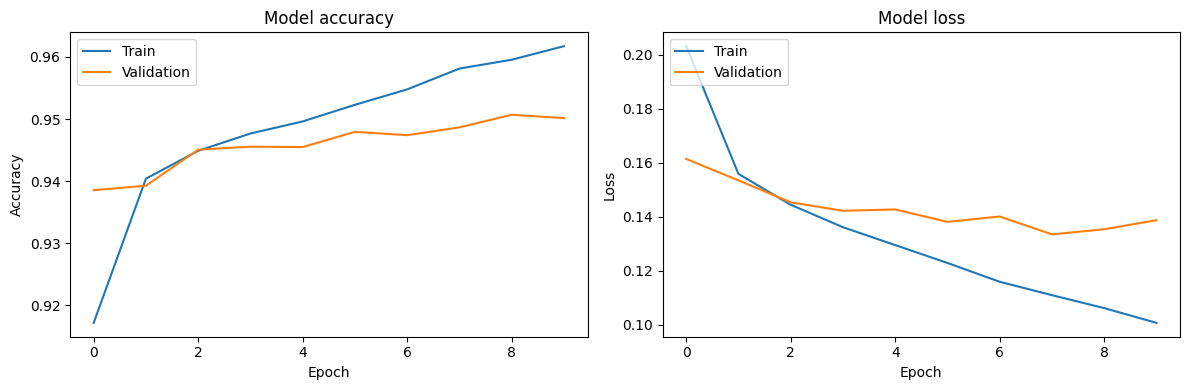

In [15]:
import matplotlib.pyplot as plt
# Plot training history
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [16]:
!pip install scikeras

In [17]:
def create_model(units=64, dropout_rate=0.2, recurrent_dropout=0.2):
    model = Sequential()
    model.add(Embedding(max_words, 32, input_length=max_len))
    model.add(SpatialDropout1D(dropout_rate))
    model.add(LSTM(units, dropout=dropout_rate, recurrent_dropout=recurrent_dropout))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [18]:
from scikeras.wrappers import KerasClassifier

In [19]:
model = KerasClassifier(build_fn=create_model, epochs=5, batch_size=32, verbose=0, dropout_rate=0.2, recurrent_dropout=0.2, units=64)


In [20]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS


text_clf = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words=ENGLISH_STOP_WORDS)),
    ('clf_keras', model)  # Update the name
])

In [21]:
# Define the hyperparameter grid
param_grid = {
    'units': [32, 64],
    'dropout_rate': [0.2, 0.4]
}


In [ ]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2)

grid_result = grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 4 candidates, totalling 12 fits


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END .........................dropout_rate=0.2, units=32; total time= 4.5min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


In [ ]:
# Best parameters and model
best_params = grid_result.best_params_
best_model = grid_result.best_estimator_




y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Parameters: {best_params}")
print(f"Test Accuracy with Best Model: {accuracy:.4f}")

In [ ]:
best_model.fit(X_train, y_train, validation_data=(X_test, y_test))

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

In [ ]:
# Save the best model within the Colab environment
best_model.model_.save("Spam_model.h5")



In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Calculate and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
